In [ ]:
import pandas as pd
import numpy as np

**First I will plot the relationship between WR Angle to QB with EPA**

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
df = pd.read_csv("gdrive/My Drive/BigDataBowl2021/plyrsWithTargets.csv")

Mounted at /content/gdrive


In [ ]:
df.head(3)

,Unnamed: 0,gameId,playId,gameClock,defendersInTheBox,passResult,targetNflId,time,x,y,s,a,dis,event,epa,frameId,nflId,displayName,position,route,targetedReceiver,qbX,qbY,distanceFromQB,angleToQB
0,1,2018090600,75,15:00:00,7.0,C,2495454.0,2018-09-07 01:07:14,28.65,9.173333,0.02,0.03,0.01,None,0.261827,1,2495454,Julio Jones,WR,HITCH,1.0,28.27,26.663333,17.494128,-88.755379
1,2,2018090600,75,15:00:00,7.0,C,2495454.0,2018-09-07 01:07:14,29.22,17.183333,0.00,0.00,0.00,None,0.261827,1,2533040,Mohamed Sanu,WR,HITCH,0.0,28.27,26.663333,9.527481,-84.277469
2,3,2018090600,75,15:00:00,7.0,C,2495454.0,2018-09-07 01:07:14,21.75,26.703333,0.01,0.01,0.00,None,0.261827,1,2543583,Devonta Freeman,RB,NaN,0.0,28.27,26.663333,6.520123,-0.351504


In [ ]:
df['event'].unique()

array(['None', 'ball_snap', 'pass_forward', 'pass_arrived',
       'pass_outcome_caught', 'out_of_bounds', 'pass_outcome_incomplete',
       'first_contact', 'tackle', 'man_in_motion', 'play_action',
       'qb_sack', 'fumble', 'fumble_offense_recovered', 'handoff',
       'pass_tipped', 'pass_outcome_interception', 'qb_strip_sack',
       'pass_shovel', 'line_set', 'pass_outcome_touchdown',
       'fumble_defense_recovered', 'qb_spike', 'touchdown',
       'penalty_flag', 'shift', 'run', 'touchback', 'penalty_accepted',
       'field_goal_blocked', 'run_pass_option', 'punt_fake',
       'snap_direct', 'pass_lateral', 'lateral', 'huddle_start_offense',
       'huddle_break_offense', 'timeout_home', 'safety'], dtype=object)

In [ ]:
filter_df = df[(df.targetedReceiver == 1) & ((df.event == 'pass_outcome_caught') | (df.event == 'pass_outcome_incomplete') |
                                 (df.event == 'pass_outcome_interception') | (df.event == 'pass_outcome_touchdown'))]

In [ ]:
filter_df.head()

,Unnamed: 0,gameId,playId,gameClock,defendersInTheBox,passResult,targetNflId,time,x,y,s,a,dis,event,epa,frameId,nflId,displayName,position,route,targetedReceiver,qbX,qbY,distanceFromQB,angleToQB
255,256,2018090600,75,15:00:00,7.0,C,2495454.0,2018-09-07 01:07:19,38.52,3.203333,4.93,3.07,0.49,pass_outcome_caught,0.261827,52,2495454,Julio Jones,WR,HITCH,1.0,23.90,25.513333,26.673592,-56.762733
534,535,2018090600,146,13:10:00,7.0,I,2560854.0,2018-09-07 01:09:14,72.75,16.233333,1.93,2.46,0.16,pass_outcome_incomplete,-0.372360,48,2560854,Calvin Ridley,WR,HITCH,1.0,65.23,23.473333,10.438774,-43.913234
772,773,2018090600,168,13:05:00,6.0,I,2543583.0,2018-09-07 01:09:55,68.10,43.113333,2.42,1.68,0.24,pass_outcome_incomplete,-0.702779,47,2543583,Devonta Freeman,RB,SCREEN,1.0,64.62,25.913333,17.548516,78.562032
1085,1086,2018090600,190,13:01:00,6.0,C,2495454.0,2018-09-07 01:10:40,97.16,44.633333,7.57,2.57,0.78,pass_outcome_caught,3.047530,62,2495454,Julio Jones,WR,CORNER,1.0,63.41,27.443333,37.875567,26.991270
1371,1372,2018090600,256,10:59:00,8.0,I,2543583.0,2018-09-07 01:12:42,110.88,9.213333,4.70,4.12,0.49,pass_outcome_incomplete,-0.842272,46,2543583,Devonta Freeman,RB,OUT,1.0,101.41,28.003333,21.041507,-63.252308


In [ ]:
filter_df['roundAngle'] = round(filter_df.angleToQB, 0)
filter_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,gameId,playId,gameClock,defendersInTheBox,passResult,targetNflId,time,x,y,s,a,dis,event,epa,frameId,nflId,displayName,position,route,targetedReceiver,qbX,qbY,distanceFromQB,angleToQB,roundAngle
255,256,2018090600,75,15:00:00,7.0,C,2495454.0,2018-09-07 01:07:19,38.52,3.203333,4.93,3.07,0.49,pass_outcome_caught,0.261827,52,2495454,Julio Jones,WR,HITCH,1.0,23.90,25.513333,26.673592,-56.762733,-57.0
534,535,2018090600,146,13:10:00,7.0,I,2560854.0,2018-09-07 01:09:14,72.75,16.233333,1.93,2.46,0.16,pass_outcome_incomplete,-0.372360,48,2560854,Calvin Ridley,WR,HITCH,1.0,65.23,23.473333,10.438774,-43.913234,-44.0
772,773,2018090600,168,13:05:00,6.0,I,2543583.0,2018-09-07 01:09:55,68.10,43.113333,2.42,1.68,0.24,pass_outcome_incomplete,-0.702779,47,2543583,Devonta Freeman,RB,SCREEN,1.0,64.62,25.913333,17.548516,78.562032,79.0
1085,1086,2018090600,190,13:01:00,6.0,C,2495454.0,2018-09-07 01:10:40,97.16,44.633333,7.57,2.57,0.78,pass_outcome_caught,3.047530,62,2495454,Julio Jones,WR,CORNER,1.0,63.41,27.443333,37.875567,26.991270,27.0
1371,1372,2018090600,256,10:59:00,8.0,I,2543583.0,2018-09-07 01:12:42,110.88,9.213333,4.70,4.12,0.49,pass_outcome_incomplete,-0.842272,46,2543583,Devonta Freeman,RB,OUT,1.0,101.41,28.003333,21.041507,-63.252308,-63.0


In [ ]:
round_angs = filter_df.groupby('roundAngle').agg({'epa':'mean'})
round_angs.reset_index(inplace=True)
round_angs.head()

,roundAngle,epa
0,-90.0,-0.325764
1,-89.0,-0.611267
2,-88.0,-0.303633
3,-87.0,0.118583
4,-86.0,0.059090


In [ ]:
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.palettes import magma 
  
# file to save the model  
# output_file("gfg.html")
output_notebook() 
       
# instantiating the figure object  
graph = figure(title = "Relationship Between Receiver Angle to QB and EPA")  
  
# name of the x-axis  
graph.xaxis.axis_label = "Angle to QB"
       
# name of the y-axis  
graph.yaxis.axis_label = "Expected Points Addded"

size = 10
  
# plotting the graph  
graph.line(round_angs['roundAngle'],
              round_angs['epa'])  
       
# displaying the model  
show(graph) 

**Now implement xgboost for target probability**

In [ ]:
df['event'].unique()

array(['None', 'ball_snap', 'pass_forward', 'pass_arrived',
       'pass_outcome_caught', 'out_of_bounds', 'pass_outcome_incomplete',
       'first_contact', 'tackle', 'man_in_motion', 'play_action',
       'qb_sack', 'fumble', 'fumble_offense_recovered', 'handoff',
       'pass_tipped', 'pass_outcome_interception', 'qb_strip_sack',
       'pass_shovel', 'line_set', 'pass_outcome_touchdown',
       'fumble_defense_recovered', 'qb_spike', 'touchdown',
       'penalty_flag', 'shift', 'run', 'touchback', 'penalty_accepted',
       'field_goal_blocked', 'run_pass_option', 'punt_fake',
       'snap_direct', 'pass_lateral', 'lateral', 'huddle_start_offense',
       'huddle_break_offense', 'timeout_home', 'safety'], dtype=object)

In [ ]:
filter_df = df[(df.gameId == 2018090600) & (df.playId == 75)]
filter_df

,Unnamed: 0,gameId,playId,gameClock,defendersInTheBox,passResult,targetNflId,time,x,y,s,a,dis,event,epa,frameId,nflId,displayName,position,route,targetedReceiver,qbX,qbY,distanceFromQB,angleToQB
0,1,2018090600,75,15:00:00,7.0,C,2495454.0,2018-09-07 01:07:14,28.65,9.173333,0.02,0.03,0.01,None,0.261827,1,2495454,Julio Jones,WR,HITCH,1.0,28.27,26.663333,17.494128,-88.755379
1,2,2018090600,75,15:00:00,7.0,C,2495454.0,2018-09-07 01:07:14,29.22,17.183333,0.00,0.00,0.00,None,0.261827,1,2533040,Mohamed Sanu,WR,HITCH,0.0,28.27,26.663333,9.527481,-84.277469
2,3,2018090600,75,15:00:00,7.0,C,2495454.0,2018-09-07 01:07:14,21.75,26.703333,0.01,0.01,0.00,None,0.261827,1,2543583,Devonta Freeman,RB,NaN,0.0,28.27,26.663333,6.520123,-0.351504
3,4,2018090600,75,15:00:00,7.0,C,2495454.0,2018-09-07 01:07:14,28.71,31.503333,0.01,0.02,0.01,None,0.261827,1,2555415,Austin Hooper,TE,OUT,0.0,28.27,26.663333,4.859959,84.805601
4,5,2018090600,75,15:00:00,7.0,C,2495454.0,2018-09-07 01:07:14,24.87,26.623333,0.01,0.01,0.01,None,0.261827,1,2559033,Ricky Ortiz,FB,FLAT,0.0,28.27,26.663333,3.400235,0.674037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,291,2018090600,75,15:00:00,7.0,C,2495454.0,2018-09-07 01:07:20,40.40,-1.586667,7.26,3.87,0.96,None,0.261827,59,2495454,Julio Jones,WR,HITCH,1.0,24.66,25.033333,30.925265,-59.404844
291,292,2018090600,75,15:00:00,7.0,C,2495454.0,2018-09-07 01:07:20,43.78,14.883333,2.47,1.57,0.25,None,0.261827,59,2533040,Mohamed Sanu,WR,HITCH,0.0,24.66,25.033333,21.647099,-27.961954
292,293,2018090600,75,15:00:00,7.0,C,2495454.0,2018-09-07 01:07:20,32.70,21.943333,2.21,2.11,0.23,None,0.261827,59,2543583,Devonta Freeman,RB,NaN,0.0,24.66,25.033333,8.613344,-21.023191
293,294,2018090600,75,15:00:00,7.0,C,2495454.0,2018-09-07 01:07:20,42.59,43.743333,3.44,5.45,0.38,None,0.261827,59,2555415,Austin Hooper,TE,OUT,0.0,24.66,25.033333,25.914262,46.219557


When thinking about this target probability model... the only instantaneous moment we need to evaluate would be the moment in which the pass is arriving OR the moment the pass is released (ie when the QB chose to make the throw), right?

Bc the split second where that event occurs is far more important than the first 3 steps off the line (not saying those aren't important to getting there) but we only need to know what happening exactly when the target is being earned.

Account for distance from other receivers on same play, this adds more context to the moment.

FE: 

- need to get distance to nearest defender(s). Is there a mathematical function I can use to weight one really close defender and one far away to account for possible double coverages? Or, just make it 2 columns.

- should do something with player orientation and direction of motion given we evened out the field, relative to the QB and in general

- angular direction i.e. speed in x and y

In [ ]:
filter_df = df[df.event == 'pass_arrived']
filter_df.head()

,Unnamed: 0,gameId,playId,gameClock,defendersInTheBox,passResult,targetNflId,time,x,y,s,a,dis,event,epa,frameId,nflId,displayName,position,route,targetedReceiver,qbX,qbY,distanceFromQB,angleToQB
230,231,2018090600,75,15:00:00,7.0,C,2495454.0,2018-09-07 01:07:19,38.89,5.463333,4.23,1.63,0.42,pass_arrived,0.261827,47,2495454,Julio Jones,WR,HITCH,1.0,23.7,25.813333,25.394066,-53.260985
231,232,2018090600,75,15:00:00,7.0,C,2495454.0,2018-09-07 01:07:19,42.34,17.813333,2.99,3.53,0.31,pass_arrived,0.261827,47,2533040,Mohamed Sanu,WR,HITCH,0.0,23.7,25.813333,20.284220,-23.228270
232,233,2018090600,75,15:00:00,7.0,C,2495454.0,2018-09-07 01:07:19,28.87,22.803333,3.85,2.91,0.38,pass_arrived,0.261827,47,2543583,Devonta Freeman,RB,NaN,0.0,23.7,25.813333,5.982391,-30.208190
233,234,2018090600,75,15:00:00,7.0,C,2495454.0,2018-09-07 01:07:19,41.65,36.593333,7.05,4.26,0.70,pass_arrived,0.261827,47,2555415,Austin Hooper,TE,OUT,0.0,23.7,25.813333,20.938264,30.987232
234,235,2018090600,75,15:00:00,7.0,C,2495454.0,2018-09-07 01:07:19,32.87,42.403333,6.81,2.09,0.69,pass_arrived,0.261827,47,2559033,Ricky Ortiz,FB,FLAT,0.0,23.7,25.813333,18.955659,61.068723


In [ ]:
filter_df = filter_df[filter_df.targetedReceiver >= 0]

In [ ]:
filter_df.targetedReceiver = filter_df.targetedReceiver.astype(int)

In [ ]:
filter_df.targetedReceiver.mean(axis = 0)

0.19990103228821596

In [ ]:
filter_df.shape

(72751, 25)

In [ ]:
predictors = filter_df[['defendersInTheBox', 's', 'a', 'distanceFromQB', 'angleToQB']]
response = filter_df.targetedReceiver
predictors.reset_index(inplace=True)
predictors = predictors[['defendersInTheBox', 's', 'a', 'distanceFromQB', 'angleToQB']]
response = np.array(response)
display(predictors,
        response)

,defendersInTheBox,s,a,distanceFromQB,angleToQB
0,7.0,4.23,1.63,25.394066,-53.260985
1,7.0,2.99,3.53,20.284220,-23.228270
2,7.0,3.85,2.91,5.982391,-30.208190
3,7.0,7.05,4.26,20.938264,30.987232
4,7.0,6.81,2.09,18.955659,61.068723
...,...,...,...,...,...
72746,6.0,5.82,4.29,15.617842,30.259089
72747,6.0,0.73,0.53,24.478464,-57.478563
72748,6.0,6.65,2.49,25.480424,-31.781342
72749,6.0,1.90,1.88,4.203534,-65.996016


array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
import xgboost as xgb

In [ ]:
predictors = xgb.DMatrix(predictors, label=response)

In [ ]:
param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic',
         'nthread': 4, 'eval_metric': 'auc', 'gamma': 0,
         'booster': 'gbtree'}

In [ ]:
num_round = 10
bst = xgb.train(param, predictors, num_round)

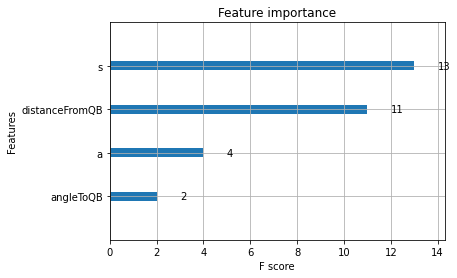

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(bst)

c_void_p(1326483136)